# Lab(01): Classifying Security Vulnerabilities

#### Exercise
'Now let's train a classifier to classify security vulnerabilities according to their CVSS severity class. The dataset provided below contains the CVSS features and severity for all of the vulnerabilities reported in 2020. The vulnerabilities are separated in four severity classes:'

0 = 'LOW'

1 = 'MIDDLE'

2 = 'HIGH'

3 = 'CRITICAL'

### Questions 
#### 1 - Fit the SVM classifier
#### 2 - Try out your classifier using the vulnerability below:
#### 3 - Use your classifier to classify the test set
#### 4 - Compute the final accuracy, precision, and recall on the test set
#### 5 - Compute the confusion matrix for the testing set

## Importing required libraries

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def cvss_score(num):
    '''Function that returns the severity of the classes 
    according to the constructed label'''
    if cvss == 0:
        return "LOW"
    elif cvss == 1:
        return "MIDDLE" 
    elif cvss == 2:
        return "HIGH"
    else: 
        return "CRITICAL"

## Collecting and Cleaning data

#### Even though the database is not necessarily large, the "Unnamed" column was considered unnecessary

In [3]:
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data = cvss_data.drop(columns=["Unnamed: 0"])
cvss_data.head(10)

,attackVector,attackComplexity,privilegesRequired,userInteraction,confidentialityImpact,integrityImpact,availabilityImpact,label
0,0.55,0.44,0.62,0.85,0.66,0.66,0.66,2
1,0.85,0.44,0.85,0.62,0.66,0.66,0.66,2
2,0.55,0.77,0.62,0.62,0.66,0.66,0.66,1
3,0.55,0.44,0.62,0.85,0.00,0.00,0.66,1
4,0.55,0.44,0.27,0.85,0.66,0.66,0.66,1
5,0.85,0.44,0.85,0.62,0.66,0.00,0.00,1
6,0.55,0.44,0.62,0.85,0.66,0.00,0.00,1
7,0.55,0.77,0.62,0.85,0.66,0.00,0.00,1
8,0.55,0.44,0.62,0.85,0.00,0.66,0.00,1
9,0.55,0.44,0.27,0.85,0.66,0.66,0.66,1


### Spliting the data into training database and test database 

In [4]:
inputs_train, inputs_test, labels_train, labels_test = model_selection.train_test_split(
      cvss_data[["attackVector", "attackComplexity", "privilegesRequired", "userInteraction", "confidentialityImpact", "integrityImpact", "availabilityImpact"]].values,
      cvss_data['label'].values,
      test_size=0.2
    )

In [5]:
print("Training set size:", inputs_train.shape)
print("Test set size:", inputs_test.shape)

Training set size: (11452, 7)
Test set size: (2863, 7)


### Fitting the SVM classifier 

In [6]:
# Selecting the classifier we want to use
svm = SVC(kernel="linear")

# Learning (or training our model) based on inputs and labels from our dataset
svm.fit(inputs_train, labels_train)

SVC(kernel='linear')

### Doing some tests with the data
#### Try out your classifier using the vulnerability below:
vulnerability = [[0.85, 0.44, 0.27, 0.85, 0.66, 0., 0.]]

In [7]:
#0.55	0.44	0.62	0.85	0.66	0.66	0.66
cvss = svm.predict([[0.55,0.44,0.62,0.85,0.66,0.66,0.66]])
cvss = cvss_score(cvss)
print(cvss)

HIGH


In [8]:
#0.55	0.44	0.27	0.85	0.66	0.66	0.66
cvss = svm.predict([[0.55,0.44,0.27,0.85,0.66,0.66,0.66]])
cvss = cvss_score(cvss)
print(cvss)

MIDDLE


In [9]:
vulnerability = [[0.85, 0.44, 0.27, 0.85, 0.66, 0.66, 0.66]]
cvss = svm.predict(vulnerability)
cvss = cvss_score(cvss)
print(cvss)

HIGH


In [10]:
vulnerability = [[0.85, 0.44, 0.27, 0.85, 0.66, 0.0, 0.0]]
cvss = svm.predict(vulnerability)
cvss = cvss_score(cvss)
print(cvss)


MIDDLE


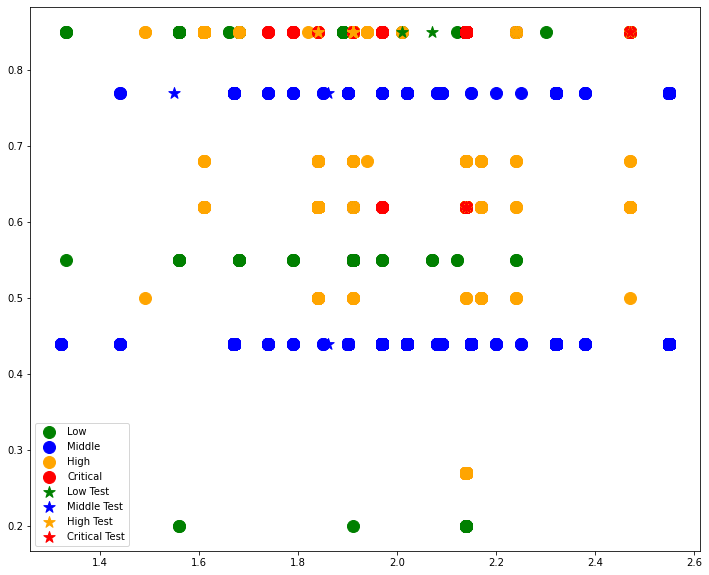

In [11]:
mpl.rcParams['lines.markersize'] = 12

# Plotting data
plt.figure(figsize=(12, 10))

plt.scatter(inputs_train[labels_train==0, 1] + inputs_train[labels_train==0, 2]
             + inputs_train[labels_train==0, 3],inputs_train[labels_train==0, 0], c='green', label='Low')

plt.scatter(inputs_train[labels_train==1, 0] + inputs_train[labels_train==1, 2]
            + inputs_train[labels_train==1, 3], inputs_train[labels_train==1, 1],c='blue',label='Middle')

plt.scatter(inputs_train[labels_train==2, 0] + inputs_train[labels_train==2, 1]
            + inputs_train[labels_train==2, 3],inputs_train[labels_train==2, 2],c='orange',label='High')

plt.scatter(inputs_train[labels_train==3, 0] + inputs_train[labels_train==3, 1]
            +inputs_train[labels_train==3, 2],inputs_train[labels_train==3, 3],c='red',label='Critical')


plt.scatter(inputs_test[labels_test==0, 1] + inputs_test[labels_test==0, 2]
            + inputs_test[labels_test==0, 3],inputs_test[labels_test==0, 0], c='green', label='Low Test'
           ,marker='*')

plt.scatter(inputs_test[labels_test==1, 0] + inputs_test[labels_test==1, 2]
            + inputs_test[labels_test==1, 3],inputs_test[labels_test==1, 1], c='blue', label='Middle Test'
           ,marker='*')

plt.scatter(inputs_test[labels_test==2, 0] + inputs_test[labels_test==2, 1]
            + inputs_test[labels_test==2, 3],inputs_test[labels_test==2, 2],c='orange',label='High Test'
           ,marker='*')


plt.scatter(inputs_test[labels_test==3, 0] + inputs_test[labels_test==3, 1] 
            +inputs_test[labels_test==3, 2],inputs_test[labels_test==3, 3],c='red', label='Critical Test'
           ,marker='*')

plt.legend()
plt.show()

## Use your classifier to classify the test set

In [12]:
classifications = svm.predict(inputs_test)
print("SVM Test Set Score:")
print(accuracy_score(labels_test, classifications)*100)

SVM Test Set Score:
95.66887879846315


## Compute the final accuracy, precision, and recall on the test set

### Precision and Recall
The following metrics can be calculated from the confusion matrix

> $precision = \frac{TP}{(TP + FP)}$

> $recall = \frac{TP}{(TP + FN)}$

These metrics can be seen as the answers to these questions:

> $precision = $ out of all the samples assigned class 1, how many really belonged to class 1?

> $recall = $ out of all samples in class 1, how many did the model correctly classify?

> $macro = $ Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

These metrics can be computed separately for each class or averaged for all classes.

In [13]:
print('Precision:', '{:0.2f}'.format(precision_score(labels_test, classifications,average='macro')))
print('Recall:', '{:0.2f}'.format(recall_score(labels_test, classifications, average='macro')))

Precision: 0.97
Recall: 0.91


#### According to the precision_score and recall_score result we can affirmative say that we have a good lead at classifying vulnerabilities

## Compute the confusion matrix for the testing set 

By definition a confusion matrix C is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is  C(1,1) and false positives is C(0,1).

According to the confusion_matrix we can confirm the result that we have a good lead at classifying vulnerabilities

In [14]:
confusion_matrix(labels_test, classifications)

array([[  49,   12,    0,    0],
       [   2, 1182,   33,    0],
       [   0,   31, 1155,    0],
       [   0,    0,   46,  353]])

Label precision according to confusion matrix

> $1 = $ 81,15% 

> $2 = $ 97,24%

> $3 = $ 96,92%

> $4 = $ 90,17% 